In [75]:
import pandas as pd

In [88]:
# the datasets with all the different settings and the "cost" features
myDF = pd.read_csv("../placement-decisions-different-costs/combined_placementDecisions_rl_los_cost_3_WR_nocap.csv")

In [89]:
myDF['index'] = range(len(myDF))
myDF.drop(['ocp_hd_low_los','ocp_wr_low_los','ocp_jl_low_los','need'], axis = 1, inplace = True)

In [90]:
same_values = myDF.groupby(by=['ocp_jl_total','ocp_hd_total', 'ocp_wr_total']).agg(list).reset_index()

In [49]:
same_values.to_csv('same_values_nocap.csv')

In [91]:
same_values

,ocp_jl_total,ocp_hd_total,ocp_wr_total,c_occu_jail,c_occu_wr,c_occu_hd,c_vio,class_mild,placement,index
0,120,116,247,"[0.00144, 0.00144]","[0.001152, 0.001152]","[0.000144, 0.000144]","[0.1, 0.5]","[0, 0]","[jail, jail]","[52416, 78912]"
1,121,114,244,"[0.00144, 0.00144]","[0.001152, 0.001152]","[0.000144, 0.000144]","[0.1, 0.5]","[0, 0]","[home detention, home detention]","[52408, 78904]"
2,121,115,244,"[0.00144, 0.00144]","[0.001152, 0.001152]","[0.000144, 0.000144]","[0.1, 0.5]","[1, 1]","[work release, work release]","[52409, 78905]"
3,121,115,245,"[0.00144, 0.00144]","[0.001152, 0.001152]","[0.000144, 0.000144]","[0.1, 0.5]","[1, 1]","[work release, work release]","[52410, 78906]"
4,121,115,246,"[0.00144, 0.00144]","[0.001152, 0.001152]","[0.000144, 0.000144]","[0.1, 0.5]","[1, 1]","[work release, work release]","[52411, 78907]"
...,...,...,...,...,...,...,...,...,...,...
46439,368,342,402,"[9e-05, 9e-05]","[2.7e-05, 2.7e-05]","[2.7e-05, 2.7e-05]","[0.1, 0.5]","[1, 1]","[work release, work release]","[24821, 51025]"
46440,368,342,403,"[9e-05, 9e-05]","[2.7e-05, 2.7e-05]","[2.7e-05, 2.7e-05]","[0.1, 0.5]","[1, 1]","[work release, work release]","[24822, 51026]"
46441,368,342,404,"[9e-05, 9e-05]","[2.7e-05, 2.7e-05]","[2.7e-05, 2.7e-05]","[0.1, 0.5]","[1, 1]","[work release, work release]","[24823, 51027]"
46442,368,342,405,"[9e-05, 9e-05]","[2.7e-05, 2.7e-05]","[2.7e-05, 2.7e-05]","[0.1, 0.5]","[1, 1]","[work release, work release]","[24824, 51028]"


In [ ]:
# classify different types of value similarity

In [92]:
length = []
for i in range(len(same_values)):
    length.append(len(same_values.iloc[i]['placement']))

In [94]:
from collections import Counter

frequency = Counter(length)
frequency

Counter({2: 41070, 4: 4634, 6: 620, 8: 99, 10: 20, 12: 1})

In [95]:
#length is 2
len_2 = pd.DataFrame(columns=same_values.columns)
for i in range(len(same_values)):
    if len(same_values.iloc[i]['placement']) == 2:
        len_2.loc[len(len_2)] = same_values.iloc[i]

In [96]:
count = 0
for i in range(len(len_2)):
    if len_2.loc[i]['placement'][0] != len_2.loc[i]['placement'][1]:
        count +=1 
count

0

In [98]:
#length is 4
len_4 = pd.DataFrame(columns=same_values.columns)
for i in range(len(same_values)):
    if len(same_values.iloc[i]['placement']) == 4:
        len_4.loc[len(len_4)] = same_values.iloc[i]

In [130]:
count_index = []
for i in range(len(len_4)):
    pivot = len_4.loc[i]['placement'][0]
    for j in len_4.loc[i]['placement']:
        if pivot != j:
            count_index.append(len_4.loc[i]['index'])
            break
len(count_index)

2395

In [100]:
#length is 6
len_6 = pd.DataFrame(columns=same_values.columns)
for i in range(len(same_values)):
    if len(same_values.iloc[i]['placement']) == 6:
        len_6.loc[len(len_6)] = same_values.iloc[i]

In [134]:
count_index6 = []
for i in range(len(len_6)):
    pivot = len_6.loc[i]['placement'][0]
    for j in len_6.loc[i]['placement']:
        if pivot != j:
            count_index6.append(len_6.loc[i]['index'])
            break
len(count_index6)

467

In [135]:
#length is 8
len_8 = pd.DataFrame(columns=same_values.columns)
for i in range(len(same_values)):
    if len(same_values.iloc[i]['placement']) == 8:
        len_8.loc[len(len_8)] = same_values.iloc[i]
count_index8 = []
for i in range(len(len_8)):
    pivot = len_8.loc[i]['placement'][0]
    for j in len_8.loc[i]['placement']:
        if pivot != j:
            count_index8.append(len_8.loc[i]['index'])
            break
len(count_index8)

78

In [136]:
#length is 10
len_10 = pd.DataFrame(columns=same_values.columns)
for i in range(len(same_values)):
    if len(same_values.iloc[i]['placement']) == 10:
        len_10.loc[len(len_10)] = same_values.iloc[i]
count_index10 = []
for i in range(len(len_10)):
    pivot = len_10.loc[i]['placement'][0]
    for j in len_10.loc[i]['placement']:
        if pivot != j:
            count_index10.append(len_10.loc[i]['index'])
            break
len(count_index10)

20

In [137]:
#length is 12
len_12 = pd.DataFrame(columns=same_values.columns)
for i in range(len(same_values)):
    if len(same_values.iloc[i]['placement']) == 12:
        len_12.loc[len(len_12)] = same_values.iloc[i]
count_index12 = []
for i in range(len(len_12)):
    pivot = len_12.loc[i]['placement'][0]
    for j in len_12.loc[i]['placement']:
        if pivot != j:
            count_index12.append(len_10.loc[i]['index'])
            break
len(count_index12)

1

In [142]:
len_10['index']

[66778, 67249, 67320, 68317, 68337, 93274, 93745, 93816, 94813, 94833]

## SHAP VALUES INTERPRETATION

In [112]:
smaller_myDF = myDF.sample(int(len(myDF)*0.2))

In [223]:
myDF[ myDF['index'] == 53563]['placement'].values[0]

'work release'

In [227]:
unique_placement_index6 = []
for row in count_index6:
    temp_value = row[0] #this is an index pointing to a row of myDF
    temp_list = []
    temp_list.append(temp_value)
    for index_placement in row:
        if (myDF[ myDF['index'] == temp_value]['placement'].values[0]) != str(myDF[ myDF['index'] == index_placement ]['placement'].values[0]):
            temp_list.append(index_placement)
            break
    unique_placement_index6.append(temp_list)

In [226]:
valid_index = []
for row in unique_placement_index6:
    if row[0] in smaller_myDF['index'] and row[1] in smaller_myDF['index']:
        valid_index.append(row)

In [306]:
valid_index

[[52790, 55068],
 [66168, 66304],
 [67697, 68006],
 [68755, 68940],
 [55844, 56596],
 [56320, 56795],
 [13558, 14784],
 [1562, 15971],
 [58225, 61730],
 [59114, 59314],
 [59450, 59881],
 [5049, 18201],
 [4275, 4518],
 [6626, 19270],
 [7299, 10607],
 [20280, 20639],
 [21699, 23481],
 [8235, 21286],
 [8819, 23089],
 [8562, 11338],
 [8423, 12338],
 [12357, 12580]]

In [ ]:
## Build and Train a model

In [166]:
smaller_myDF

,c_occu_jail,c_occu_wr,c_occu_hd,c_vio,ocp_jl_total,ocp_wr_total,ocp_hd_total,class_mild,placement,index
61334,0.00144,0.001152,0.000144,0.1,285,359,321,1,work release,61334
38101,0.00009,0.000072,0.000009,0.5,345,379,339,0,jail,38101
103677,0.00144,0.000432,0.000432,0.5,318,380,321,1,work release,103677
14940,0.00009,0.000027,0.000027,0.1,246,302,202,1,work release,14940
79189,0.00144,0.001152,0.000144,0.5,172,287,203,1,work release,79189
...,...,...,...,...,...,...,...,...,...,...
80324,0.00144,0.001152,0.000144,0.5,203,311,247,0,home detention,80324
47463,0.00009,0.000027,0.000027,0.5,316,358,311,1,work release,47463
102361,0.00144,0.000432,0.000432,0.5,281,376,308,1,home detention,102361
85971,0.00144,0.001152,0.000144,0.5,278,348,314,1,work release,85971


In [173]:
# one hot encoding  -> the target is "placement", so we don't need to encode this column, also bcz RandomForest can handle categorical target data
# work release = 0 | home detention = 1 | jail = 2
for ind, item in smaller_myDF.iterrows():
    if item['placement'] == 'work release':
        smaller_myDF['placement'].at[ind] = '0'
    elif item['placement'] == 'home detention':
        smaller_myDF['placement'].at[ind] = '1'
    elif item['placement'] == 'jail':
        smaller_myDF['placement'].at[ind] = '2'

#object to int
smaller_myDF['placement'] = pd.to_numeric(smaller_myDF['placement'])

In [174]:
smaller_y = smaller_myDF['placement']
smaller_X = smaller_myDF.drop(['placement'], axis = 1)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split( smaller_X, smaller_y, train_size = 0.7, random_state = 50)

In [300]:
X_train

,c_occu_jail,c_occu_wr,c_occu_hd,c_vio,ocp_jl_total,ocp_wr_total,ocp_hd_total,class_mild,index
9783,0.00009,0.000072,0.000009,0.1,319,342,307,1,9783
15859,0.00009,0.000027,0.000027,0.1,246,299,191,0,15859
57212,0.00144,0.001152,0.000144,0.1,223,317,300,1,57212
100504,0.00144,0.000432,0.000432,0.5,308,381,319,1,100504
66501,0.00144,0.000432,0.000432,0.1,200,326,209,1,66501
...,...,...,...,...,...,...,...,...,...
66891,0.00144,0.000432,0.000432,0.1,200,315,214,0,66891
92145,0.00144,0.000432,0.000432,0.5,137,257,100,0,92145
89319,0.00144,0.001152,0.000144,0.5,284,362,329,1,89319
58836,0.00144,0.001152,0.000144,0.1,259,347,307,1,58836


In [262]:
X_train2 = X_train.drop(['index',], axis = 1)

In [ ]:
#halving grid search

In [271]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
param_grid = {'n_estimators': [20, 50, 100, 150], 'max_depth': [None, 5, 10], 
              'min_samples_leaf': [2, 5, 10],
              'min_samples_split': [2, 4, 6], 'max_features': ["sqrt", "log2", None]}

In [272]:
rf = RandomForestClassifier( random_state= 50)
sh = HalvingGridSearchCV(rf, param_grid, cv = 5, factor = 2, random_state=50).fit(X_train2, y_train)
sh.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 100}

In [274]:
trained_rf = RandomForestClassifier(max_depth=None, max_features = None, min_samples_leaf = 5, min_samples_split = 6, n_estimators= 100)
trained_rf.fit(X_train2, y_train)

RandomForestClassifier(max_features=None, min_samples_leaf=5,
                       min_samples_split=6)

In [275]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, trained_rf.predict_proba(X_test.drop(['index','ocp_wr_total','ocp_jl_total','ocp_hd_total'], axis=1)), multi_class='ovr' )

0.7869313730877551

In [276]:
from sklearn.metrics import f1_score
y_pred = trained_rf.predict(X_test.drop(['index','ocp_wr_total','ocp_jl_total','ocp_hd_total'], axis=1))
print('f1_score: ' + str(f1_score(y_test, y_pred, average='weighted')))

f1_score: 0.7012604138790164


In [ ]:
## Apply Shap library

In [181]:
import shap

In [277]:
import shap
explainer = shap.TreeExplainer(trained_rf)
shap_values = explainer(X_train.drop(['index','ocp_wr_total','ocp_jl_total','ocp_hd_total'], axis=1))

In [278]:
shap_values.shape

(14755, 5, 3)

In [ ]:
## Interpretation

In [279]:
search_X_train = X_train.copy()
search_X_train['search_index'] = range(len(X_train))

In [293]:
valid_index[:5]

[[52790, 55068],
 [66168, 66304],
 [67697, 68006],
 [68755, 68940],
 [55844, 56596]]

In [294]:
search_X_train[ search_X_train['index'] == 68755]['search_index']

68755    13457
Name: search_index, dtype: int64

In [295]:
search_X_train[ search_X_train['index'] == 68940]['search_index']

68940    11117
Name: search_index, dtype: int64

In [296]:
# test with index 68755 (13457) and 68940 (11117) / intial_index (index of X_train)

In [302]:
myDF[ myDF['index'] == 68755]

,c_occu_jail,c_occu_wr,c_occu_hd,c_vio,ocp_jl_total,ocp_wr_total,ocp_hd_total,class_mild,placement,index
68755,0.00144,0.000432,0.000432,0.1,212,335,230,1,work release,68755


In [303]:
myDF[ myDF['index'] == 68940]

,c_occu_jail,c_occu_wr,c_occu_hd,c_vio,ocp_jl_total,ocp_wr_total,ocp_hd_total,class_mild,placement,index
68940,0.00144,0.000432,0.000432,0.1,212,335,230,0,jail,68940


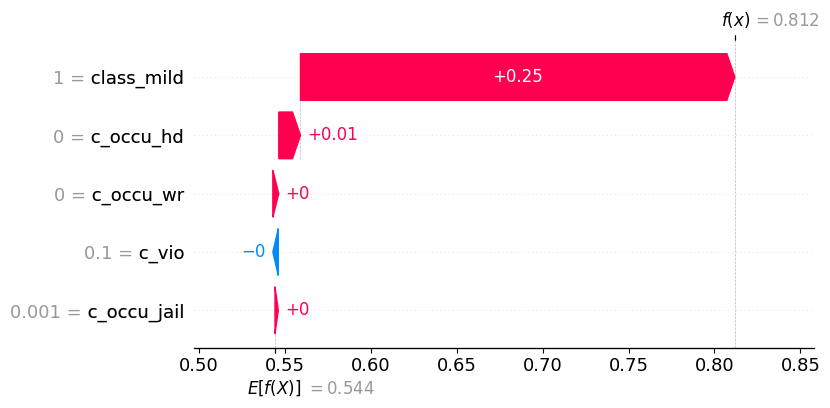

In [304]:
shap.waterfall_plot(shap_values[13457,:,0]) #placement is Work Release

In [311]:
print(sorted(shap_values[13457,:,0].values, key =abs))

[0.0019165853505515686, -0.0031675848210089724, 0.0034450688889313273, 0.012623160234767308, 0.2526400008680087]


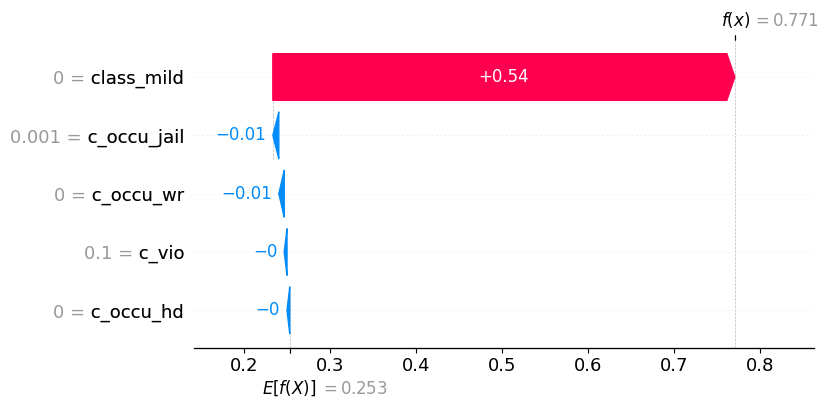

In [305]:
shap.waterfall_plot(shap_values[11117,:,2]) #placement is Jail

In [312]:
print(sorted(shap_values[11117,:,0].values, key =abs))

[0.0008034669556548388, 0.0012915698760632228, -0.001413040776840898, 0.004969973764310381, -0.5500389572810652]
